In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from video import *
import numpy as np
import ultralytics
import cv2 as cv
from utils import *

In [39]:
query = load_video("train/task1/06_query.mp4")
reference = load_video("train/task1/06_reference.mp4")

In [40]:
F = np.load("fundamental_matrices/AB.npy")

In [41]:
def get_objects_camera_A(frame):
    objects = frame.get_objects()
    result = []
    for object in objects:
        x1, y1, x2, y2 = object["bbox"]
        center = np.array([(x1 + x2) / 2, (y1 + y2) / 2, 1])
        if center[1] < 500:
            continue
        result.append(object)
    return result

In [ ]:
def get_objects_camera_B(frame):
    objects = frame.get_objects()
    result = []
    for object in objects:
        x1, y1, x2, y2 = object["bbox"]
        center = np.array([(x1 + x2) / 2, (y1 + y2) / 2, 1])
        if center[1] < 700:
            continue
        result.append(object)
    return result

In [33]:
best_frame = 0
max_objects = 0

for i in range(query.num_frames()):
    objects = get_objects_camera_A(query.get_frame(i))
    if len(objects) > max_objects:
        max_objects = len(objects)
        best_frame = i
print(f"Best frame: {best_frame}, max objects: {max_objects}")

Best frame: 135, max objects: 7


[{'class': 'car', 'bbox': [1383, 645, 1622, 847]}, {'class': 'car', 'bbox': [806, 729, 1198, 971]}, {'class': 'car', 'bbox': [487, 626, 815, 824]}, {'class': 'car', 'bbox': [1549, 541, 1671, 647]}, {'class': 'truck', 'bbox': [1120, 503, 1324, 693]}, {'class': 'truck', 'bbox': [449, 563, 676, 674]}, {'class': 'truck', 'bbox': [449, 563, 677, 675]}]


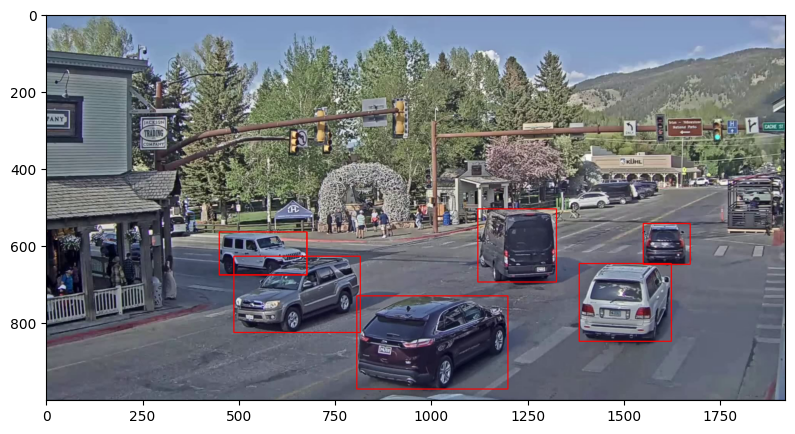

In [34]:
query_frame = query.get_frame(best_frame)
objects_plot = query_frame.raw().copy()
objects_a = get_objects_camera_A(query_frame) 
print(objects_a)

for object in objects_a:
    x1, y1, x2, y2 = object["bbox"]
    cv.rectangle(objects_plot, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.figure(figsize=(10, 5))
plt.imshow(objects_plot)
plt.show()

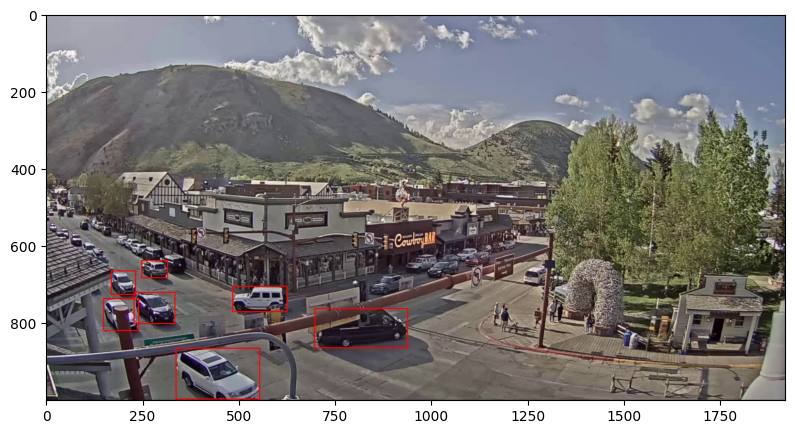

In [35]:
reference_frame = reference.get_frame(756)
objects_plot = reference_frame.raw().copy()
objects_b = get_objects_camera_B(reference_frame) 

for object in objects_b:
    x1, y1, x2, y2 = object["bbox"]
    cv.rectangle(objects_plot, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.figure(figsize=(10, 5))
plt.imshow(objects_plot)
plt.show()

6068.9660427766585
[{'class': 'car', 'bbox': [1383, 645, 1622, 847]}, {'class': 'car', 'bbox': [806, 729, 1198, 971]}, {'class': 'car', 'bbox': [487, 626, 815, 824]}, {'class': 'car', 'bbox': [1549, 541, 1671, 647]}, {'class': 'truck', 'bbox': [1120, 503, 1324, 693]}, {'class': 'truck', 'bbox': [449, 563, 676, 674]}, {'class': 'truck', 'bbox': [449, 563, 677, 675]}]


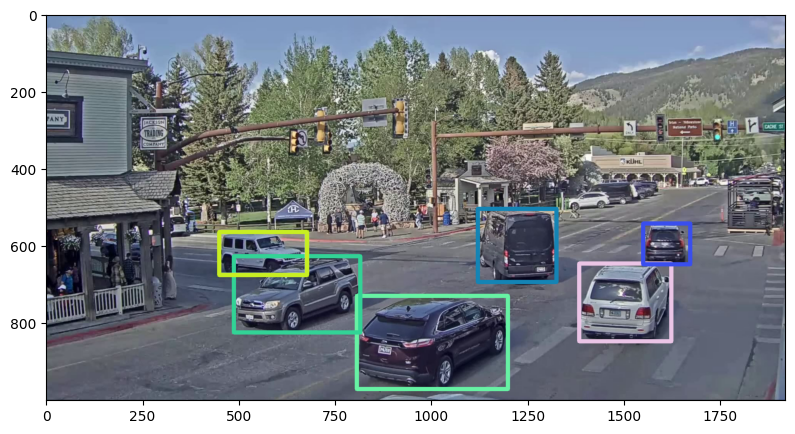

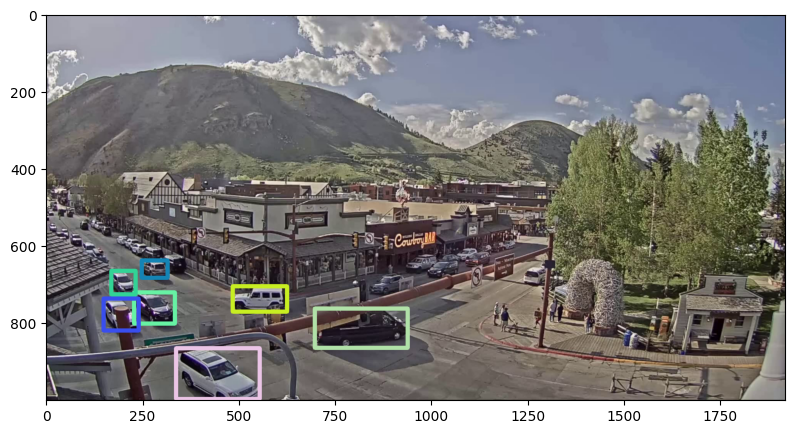

In [36]:
matching_query = query_frame.raw().copy()
matching_reference = reference_frame.raw().copy()

assignment, cost, _ = get_assignment(objects_a, objects_b, query_frame.raw().copy(), reference_frame.raw().copy(), F)
print(cost)

print(objects_a)
for i in range(len(assignment[0])):
    a = assignment[0][i]
    b = assignment[1][i]

    box_a = objects_a[a]["bbox"]
    box_b = objects_b[b]["bbox"]

    color = np.random.randint(0, 255, size=3).tolist()
    cv.rectangle(matching_query, (box_a[0], box_a[1]), (box_a[2], box_a[3]), color, 10)
    cv.rectangle(matching_reference, (box_b[0], box_b[1]), (box_b[2], box_b[3]), color, 10)

plt.figure(figsize=(10, 5))
plt.imshow(matching_query)
plt.show()
plt.figure(figsize=(10, 5))
plt.imshow(matching_reference)
plt.show()

In [24]:
num_query_frames = query.num_frames()
num_reference_frames = reference.num_frames()
print(num_query_frames)
costs = []

for i in range(0, num_reference_frames-num_query_frames+1):
    total_cost = 0

    for t in range(1):
        frame_a = query.get_frame(best_frame + t)
        frame_b = reference.get_frame(i + t)

        objects_a = get_objects_camera_A(frame_a) 
        objects_b = get_objects_camera_B(frame_b) 

        assingment, cost, _ = get_assignment(objects_a, objects_b, frame_a.raw(), frame_b.raw(), F) 
        total_cost += cost

    costs.append(total_cost)
    print(f"Frame {i}: cost = {total_cost:.2f}")

180
Frame 0: cost = 18032.11
Frame 1: cost = 18032.70
Frame 2: cost = 18033.13
Frame 3: cost = 18032.54
Frame 4: cost = 18032.54
Frame 5: cost = 18033.03
Frame 6: cost = 18034.85
Frame 7: cost = 18034.85
Frame 8: cost = 18038.41
Frame 9: cost = 18038.41
Frame 10: cost = 18038.38
Frame 11: cost = 18038.38
Frame 12: cost = 18038.35
Frame 13: cost = 18038.35
Frame 14: cost = 18037.24
Frame 15: cost = 18037.15
Frame 16: cost = 18037.15
Frame 17: cost = 18037.15
Frame 18: cost = 18034.27
Frame 19: cost = 18034.27
Frame 20: cost = 18032.18
Frame 21: cost = 18032.18
Frame 22: cost = 18030.98
Frame 23: cost = 18030.98
Frame 24: cost = 18029.60
Frame 25: cost = 18029.60
Frame 26: cost = 18027.02
Frame 27: cost = 18027.02
Frame 28: cost = 18027.02
Frame 29: cost = 18026.53
Frame 30: cost = 18024.62
Frame 31: cost = 18024.62
Frame 32: cost = 18023.61
Frame 33: cost = 18023.12
Frame 34: cost = 18021.34
Frame 35: cost = 18021.03
Frame 36: cost = 18021.03
Frame 37: cost = 18019.65
Frame 38: cost = 1

756


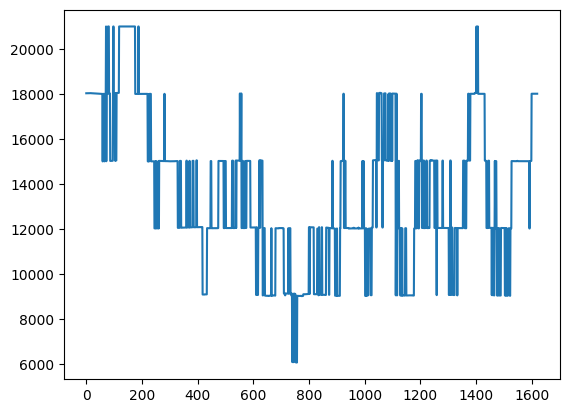

In [25]:
plt.plot(costs)
print(np.argmin(costs))